In [1]:
import tensorflow as tf 
tf.__version__

'2.8.0'

In [2]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
series = np.sin(0.1 * np.arange(200)) # + np.random.randn(200) * 0.1 

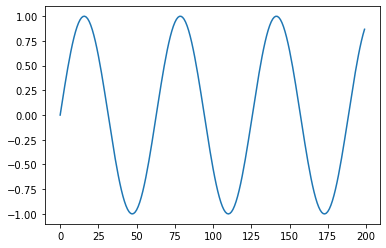

In [4]:
plt.plot(series)
# plt.show()

### Build a dataset

In [5]:
T = 10
X = []
Y = []

In [6]:
for t in range(len(series) - T):
    x = series[t : t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

In [7]:
X = np.array(X).reshape(-1 ,T)
Y = np.array(Y)
N = len(X)
print(f"X.shape:{X.shape}, Y.shape:{Y.shape}, N.length:{N}")

X.shape:(190, 10), Y.shape:(190,), N.length:190


In [8]:
# linear model
i = Input(shape=(T, ))
x = Dense(1)(i)

model = Model(i, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='mse', optimizer=Adam(lr=0.1))

C:\Users\user\Desktop\.ipynb_checkpoints\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
# train the model
# X:학습데이터, Y:정답데이터, epochs=80, validation_data:검증 데이터 
r = model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80
3/3 [==============================] - 0s 48ms/step - loss: 4.1173 - val_loss: 0.8317
Epoch 2/80
3/3 [==============================] - 0s 11ms/step - loss: 0.7807 - val_loss: 0.9432
Epoch 3/80
3/3 [==============================] - 0s 11ms/step - loss: 1.4233 - val_loss: 1.2508
Epoch 4/80
3/3 [==============================] - 0s 10ms/step - loss: 1.0721 - val_loss: 0.5714
Epoch 5/80
3/3 [==============================] - 0s 9ms/step - loss: 0.3030 - val_loss: 0.2635
Epoch 6/80
3/3 [==============================] - 0s 11ms/step - loss: 0.3332 - val_loss: 0.3782
Epoch 7/80
3/3 [==============================] - 0s 10ms/step - loss: 0.4847 - val_loss: 0.2552
Epoch 8/80
3/3 [==============================] - 0s 11ms/step - loss: 0.2322 - val_loss: 0.0605
Epoch 9/80
3/3 [==============================] - 0s 10ms/step - loss: 0.0406 - val_loss: 0.0857
Epoch 10/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0977 - val_loss: 0.1084
Epoch 11/80
3/3 [=============

3/3 [==============================] - 0s 10ms/step - loss: 3.9953e-11 - val_loss: 4.1339e-11


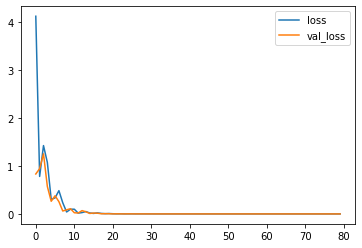

In [11]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

### "Wrong" forecast usring true targets

In [12]:
validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2 
while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
    i += 1
    
    validation_predictions.append(p)

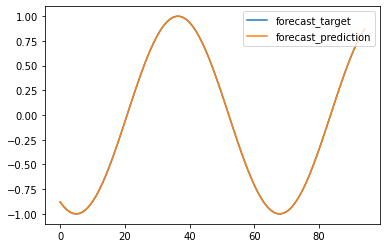

In [13]:
plt.plot(validation_target, label='forecast_target')
plt.plot(validation_predictions, label='forecast_prediction')
plt.legend()

In [14]:
validation_target = Y[-N//2:]
validation_predictions = []

# last train input 
last_x = X[-N//2]

In [15]:
print(len(validation_target))
print(last_x)

95
[-0.07515112 -0.17432678 -0.27176063 -0.36647913 -0.45753589 -0.54402111
 -0.62507065 -0.69987469 -0.76768581 -0.82782647]


In [16]:
print(last_x.reshape(1, -1))

[[-0.07515112 -0.17432678 -0.27176063 -0.36647913 -0.45753589 -0.54402111
  -0.62507065 -0.69987469 -0.76768581 -0.82782647]]


In [17]:
print(model.predict(last_x.reshape(1, -1))[0,0])

-0.87969255


In [18]:
while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
    validation_predictions.append(p)
    
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

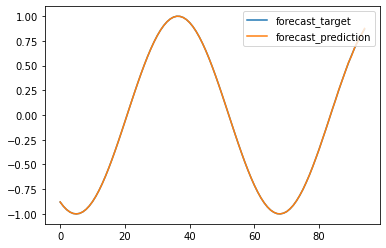

In [19]:
plt.plot(validation_target, label='forecast_target')
plt.plot(validation_predictions, label='forecast_prediction')
plt.legend()

### Noise examples

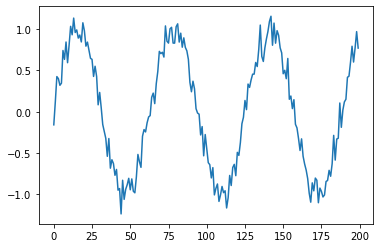

In [20]:
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200) * 0.1

plt.plot(series)
plt.show()

In [21]:
T = 10
X = []
Y = []
for t in range(len(series) - T):
    x = series[t : t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

In [22]:
X = np.array(X).reshape(-1 ,T)
Y = np.array(Y)
N = len(X)
print(f"X.shape:{X.shape}, Y.shape:{Y.shape}, N.length:{N}")

X.shape:(190, 10), Y.shape:(190,), N.length:190


In [23]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(lr=0.1))

C:\Users\user\Desktop\.ipynb_checkpoints\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [24]:
r = model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80
3/3 [==============================] - 0s 65ms/step - loss: 0.6102 - val_loss: 0.4451
Epoch 2/80
3/3 [==============================] - 0s 13ms/step - loss: 0.3533 - val_loss: 0.1339
Epoch 3/80
3/3 [==============================] - 0s 14ms/step - loss: 0.1622 - val_loss: 0.1410
Epoch 4/80
3/3 [==============================] - 0s 13ms/step - loss: 0.1225 - val_loss: 0.0488
Epoch 5/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0717 - val_loss: 0.0893
Epoch 6/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0704 - val_loss: 0.0497
Epoch 7/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0678 - val_loss: 0.1025
Epoch 8/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0733 - val_loss: 0.0624
Epoch 9/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0519 - val_loss: 0.0569
Epoch 10/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0512 - val_loss: 0.0383
Epoch 11/80
3/3 [============

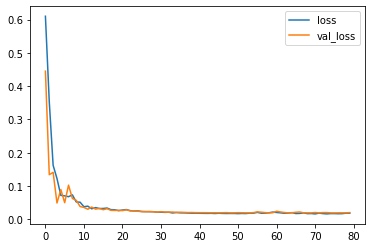

In [25]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [26]:
validation_target = Y[-N//2:]
validation_predictions = []
i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1))[0,0]
    i += 1
    
    validation_predictions.append(p)

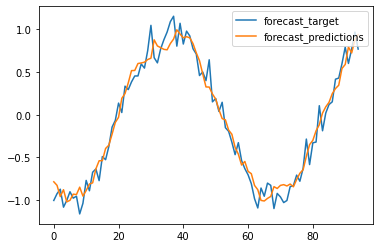

In [27]:
plt.plot(validation_target, label='forecast_target')
plt.plot(validation_predictions, label='forecast_predictions')
plt.legend()

In [28]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]
while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
    validation_predictions.append(p)
    
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

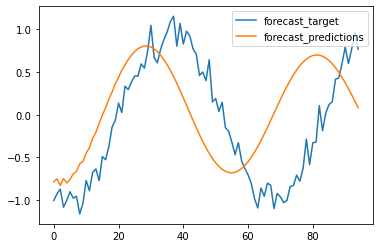

In [29]:
plt.plot(validation_target, label='forecast_target')
plt.plot(validation_predictions, label='forecast_predictions')
plt.legend()

In [30]:
print(last_x)

[0.63539934 0.59713656 0.5511409  0.49811056 0.43882984 0.37417534
 0.30508798 0.23257095 0.15766767 0.08145006]
